# Step 1: Minimal Octo Inference Example

This notebook demonstrates how to load a pre-trained / finetuned Octo checkpoint, run inference on some images, and compare the outputs to the true actions.

First, let's start with a minimal example!

In [1]:
# # run this block if you're using Colab

# # Download repo
# !git clone https://github.com/octo-models/octo.git
# %cd octo
# # Install repo
# !pip3 install -e .
# !pip3 install -r requirements.txt
# !pip3 install --upgrade "jax[cuda11_pip]==0.4.20" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
# !pip install numpy==1.21.1 # to fix colab AttributeError: module 'numpy' has no attribute '_no_nep50_warning', if the error still shows reload

In [2]:
import os
from octo.utils.train_utils import Timer
os.environ['TOKENIZERS_PARALLELISM'] = 'false'

2024-07-13 01:08:42.820243: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-13 01:08:42.820275: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-13 01:08:42.820887: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-13 01:08:55.247058: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/smj/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as note

In [3]:
# import os
# proxy = 'http://127.0.0.1:7890'
# os.environ['http_proxy'] = proxy
# os.environ['HTTP_PROXY'] = proxy
# os.environ['https_proxy'] = proxy
# os.environ['HTTPS_PROXY'] = proxy
# env = os.environ
# cuda_bin_path = '/usr/local/cuda-12.0/bin'
# os.environ['PATH'] = os.environ.get('PATH', '') + os.pathsep + cuda_bin_path
# cuda_lib_path = '/usr/local/cuda-12.0/lib64'
# os.environ['LD_LIBRARY_PATH'] = os.environ.get('LD_LIBRARY_PATH', '') + os.pathsep + cuda_lib_path
# os.environ['LIBRARY_PATH'] = os.environ.get('LIBRARY_PATH', '') + os.pathsep + cuda_lib_path


# print(os.environ.get('PATH', ''))
# print(os.environ.get('LD_LIBRARY_PATH', ''))
# print(os.environ.get('LIBRARY_PATH', ''))

/home/smj/anaconda3/envs/pretrain/bin:/home/smj/anaconda3/condabin:/home/smj/.local/bin:/home/smj/java/jdk-17.0.9/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin:/usr/local/cuda-12.0/bin
/home/smj/anaconda3/envs/pretrain/lib/python3.10/site-packages/cv2/../../lib64::COPPELIASIM_ROOT:/usr/local/cuda-12.0/lib64
:/usr/local/cuda-12.0/lib64


In [6]:
from octo.model.octo_model import OctoModel

In [7]:
model_1cam_5eps_s2c=OctoModel.load_pretrained(checkpoint_path="/home/smj/hx/octo/scripts/finetune_ckpt/octo_finetune/experiment_20240712_140610")
model=model_1cam_5eps_s2c

/home/smj/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/smj/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [8]:
# model.dataset_statistics.keys(),model1.dataset_statistics.keys(),model2.dataset_statistics.keys()
model.dataset_statistics['action']


{'mask': array([ True,  True,  True,  True,  True,  True,  True, False]),
 'max': array([17.23307991, 17.41507912, 26.2899971 ,  0.        , 29.12227821,
         4.35348034, 21.11197662,  1.        ]),
 'mean': array([ -5.87395096,  -9.82194138, -13.19649506, -34.46583176,
         -2.71103978, -28.99172401,   6.89568996,   0.24791667]),
 'min': array([-30.4579277 , -45.24458694, -76.72541809, -77.126297  ,
        -34.70466995, -40.        ,  -4.02233982,   0.        ]),
 'p01': array([-30.38951492, -43.74750519, -75.587677  , -75.81842041,
        -34.63498306, -40.        ,  -3.95207572,   0.        ]),
 'p99': array([16.91555023, 16.86224747, 25.68226242,  0.        , 28.19268799,
         4.20335245, 21.06058884,  1.        ]),
 'std': array([12.3100996 , 12.65208149, 25.41482925, 21.26810837, 11.86756706,
        13.59965706,  6.60395384,  0.431835  ])}

() (256, 256, 3)
None [[[ 98 123 137]
  [ 95 124 138]
  [ 98 127 142]
  ...
  [ 34  43  49]
  [ 36  46  54]
  [ 53  66  75]]

 [[101 126 140]
  [ 95 123 138]
  [ 96 124 140]
  ...
  [ 35  42  48]
  [ 42  52  60]
  [ 59  73  82]]

 [[103 126 140]
  [ 96 123 136]
  [ 93 121 136]
  ...
  [ 37  43  49]
  [ 48  58  66]
  [ 57  70  82]]

 ...

 [[ 57  52  49]
  [ 57  53  50]
  [ 55  51  50]
  ...
  [218 213 207]
  [217 213 207]
  [216 214 208]]

 [[ 57  53  50]
  [ 54  51  48]
  [ 53  52  51]
  ...
  [219 215 208]
  [218 215 208]
  [216 215 207]]

 [[ 59  58  54]
  [ 54  53  50]
  [ 52  52  51]
  ...
  [220 216 208]
  [220 217 210]
  [216 216 208]]]
(256, 256, 3)


[ WARN:0@941.893] global loadsave.cpp:241 findDecoder imread_('https://rail.eecs.berkeley.edu/datasets/bridge_release/raw/bridge_data_v2/datacol2_toykitchen7/drawer_pnp/01/2023-04-19_09-18-15/raw/traj_group0/traj0/images0/im_12.jpg'): can't open/read file: check file path/integrity


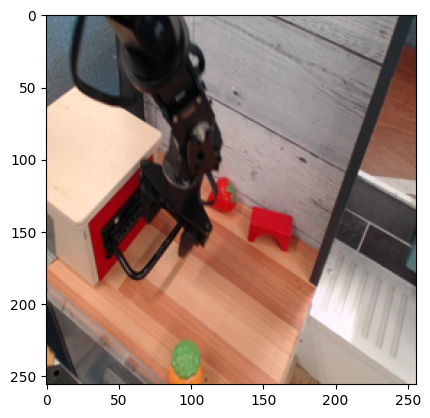

In [23]:
from PIL import Image
import requests
import matplotlib.pyplot as plt
import numpy as np
import cv2
# download one example BridgeV2 image
IMAGE_URL = "https://rail.eecs.berkeley.edu/datasets/bridge_release/raw/bridge_data_v2/datacol2_toykitchen7/drawer_pnp/01/2023-04-19_09-18-15/raw/traj_group0/traj0/images0/im_12.jpg"
img = np.array(Image.open(requests.get(IMAGE_URL, stream=True).raw).resize((256, 256)))
img1=np.array(cv2.imread(IMAGE_URL))
print(img1.shape,img.shape)
print(img1,img)
# assert img==img1
plt.imshow(img)
print(img.shape)

In [17]:
from PIL import Image
import requests
import matplotlib.pyplot as plt
import numpy as np
import cv2
# download one example BridgeV2 image
IMAGE_URL = "https://rail.eecs.berkeley.edu/datasets/bridge_release/raw/bridge_data_v2/datacol2_toykitchen7/drawer_pnp/01/2023-04-19_09-18-15/raw/traj_group0/traj0/images0/im_12.jpg"
img = np.array(Image.open(requests.get(IMAGE_URL, stream=True).raw).resize((256, 256)))


# create obs & task dict, run inference
import jax
# add batch + time horizon 1
img = img[np.newaxis,np.newaxis,...]
print(img.shape)


timer = Timer()
with timer("octo_inference"):
    observation = {"image_primary": img, "timestep_pad_mask": np.array([[True]])}
    task = model.create_tasks(texts=["pick up the forks"])
    action = model.sample_actions(
        observation, 
        task, 
        # unnormalization_statistics=model.dataset_statistics["bridge_dataset"]["action"], 
        unnormalization_statistics=model.dataset_statistics["action"], 
        rng=jax.random.PRNGKey(0)
    )
    print(action)   # [batch, action_chunk, action_dim]
# timer.tock("octo_inference")
average_times = timer.get_average_times()    
print(average_times)


[ WARN:0@788.617] global loadsave.cpp:241 findDecoder imread_('https://rail.eecs.berkeley.edu/datasets/bridge_release/raw/bridge_data_v2/datacol2_toykitchen7/drawer_pnp/01/2023-04-19_09-18-15/raw/traj_group0/traj0/images0/im_12.jpg'): can't open/read file: check file path/integrity


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# Step 2: Run Inference on Full Trajectories

That was easy! Now let's try to run inference across a whole trajectory and visualize the results!

In [10]:
# Install mediapy for visualization
# !pip install mediapy
# !pip install opencv-python

In [2]:
import cv2
import jax
import tensorflow_datasets as tfds
import tqdm
import mediapy
import numpy as np

/home/rebot801/anaconda3/envs/octo/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Model Checkpoint
First, we will load the pre-trained checkpoint using the `load_pretrained()` function. You can specify the path to a checkpoint directory or a HuggingFace path.

Below, we are loading directly from HuggingFace.


In [1]:
from octo.model.octo_model import OctoModel
checkpoint_path = "/media/rebot801/PortableSSD/ckpt/octo_finetune/pureBG_100eps_20000e_8b_8dim_2window_full_mutil_image02_256_256_finetune_20240722_170154"
step = None
model_1cam_5eps_s2c=OctoModel.load_pretrained(checkpoint_path,step)
model=model_1cam_5eps_s2c
# model = OctoModel.load_pretrained("hf://rail-berkeley/octo-small-1.5")

2024-07-22 20:51:56.015295: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-22 20:51:56.015318: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-22 20:51:56.015821: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-22 20:51:56.367677: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/rebot801/anaconda3/envs/octo/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook i

In [28]:
WINDOW_SIZE = 1
# print(goal_image.shape)
# print(goal_image[None].shape)
# create `task` dict
# task = model.create_tasks(goals={"image_primary": goal_image[None]})   # for goal-conditioned
task = model.create_tasks(texts=["pick"])                  # for language conditioned

# img = np.random.rand(256, 256, 3)

# # 使用 np.newaxis 在前两个维度分别添加额外的维度
# obs_image = img[np.newaxis, :, :, :, np.newaxis]
# arr = np.random.rand(8)

# # 使用 np.newaxis 在前两个维度分别添加额外的维度
# obs_array = arr[np.newaxis, :, np.newaxis]
# obs["image_primary"]=np.stack(img)[None][None]
# obs['proprio']=np.stack(state)[None][None]

img=cv2.imread('/home/rebot801/LIuXin/ICCUB_ws/src/octo/examples/first_try.png')
img=cv2.resize(np.array(img),(256,256))
obs=dict()
obs["image_primary"]=np.stack(img)[None][None]
state=[1,1,1,1,1,1,1,0]
obs['proprio']=np.stack(state)[None][None]
obs['timestep_pad_mask']=np.full((1, obs['image_primary'].shape[1]), True, dtype=bool)

print(obs['image_primary'].shape)
print(obs['proprio'].shape)
print(obs['timestep_pad_mask'].shape)

# this returns *normalized* actions --> we need to unnormalize using the dataset statistics
actions = model.sample_actions(
    obs, 
    task, 
    unnormalization_statistics=model.dataset_statistics["action"], 
    rng=jax.random.PRNGKey(0)
)
actions = actions[0] # remove batch dim
print(actions[0])

(1, 1, 256, 256, 3)
(1, 1, 8)
(1, 1)
[-10.744864    -6.620234   -10.748908   -18.022789    10.817588
 -23.530407    10.586751     0.08000591]


: 

## Load Data
Next, we will load a trajectory from the Bridge dataset for testing the model. We will use the publicly available copy in the Open X-Embodiment dataset bucket.

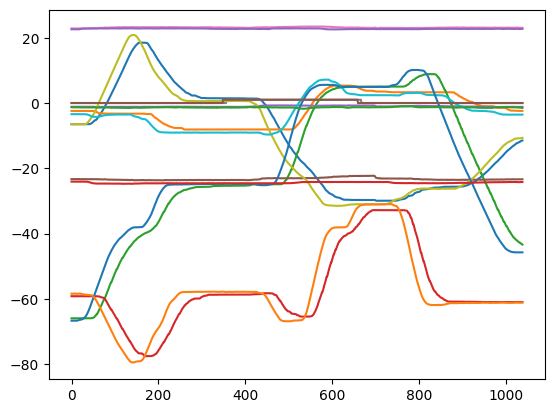

Instruction: Grab the bottle and put it in the blue box


In [4]:
# create RLDS dataset builder
builder = tfds.builder_from_directory(builder_dir='/media/rebot801/PortableSSD/tfds_pure_bg/directly_read/1.0.0')
ds = builder.as_dataset(split='train[10:11]')

# sample episode + resize to 256x256 (default third-person cam resolution)
episode = next(iter(ds))
steps = list(episode['steps'])

images01 = [cv2.resize(np.array(step['observation']['image01']), (640,360)) for step in steps]
images02 = [cv2.resize(np.array(step['observation']['image02']), (256, 256)) for step in steps]
# save the last pic
# rgb_image01 = cv2.cvtColor(cv2.resize(np.array(steps[-1]['observation']['image01']),(256,256)), cv2.COLOR_BGR2RGB)
rgb_image01 = cv2.cvtColor(images01[-1], cv2.COLOR_BGR2RGB)
cv2.imwrite('first_try_256.png', rgb_image01)
rgb_image02 = cv2.cvtColor(images02[-1], cv2.COLOR_BGR2RGB)
cv2.imwrite('second_try_256.png', rgb_image02)

# cv2.imwrite('first_try.png',images01[-1],cv2.COLOR_BGR2RGB)
# cv2.imwrite('second_try.png',images02[-1],cv2.COLOR_BGR2RGB)
states = [np.array(step['observation']['state']) for step in steps]
actions = [np.array(step['action']) for step in steps]
import matplotlib.pyplot as plt
plt.plot(states, label='state')
plt.plot(actions, label='action')
plt.show()
# extract goal image & language instruction
goal_image = images02[-1]
language_instruction = steps[0]['language_instruction'].numpy().decode()

# visualize episode
print(f'Instruction: {language_instruction}')
mediapy.show_video(images01, fps=10)

## Run Inference

Next, we will run inference over the images in the episode using the loaded model. 
Below we demonstrate setups for both goal-conditioned and language-conditioned training.
Note that we need to feed inputs of the correct temporal window size.

In [4]:
images02 = []
for _ in range(10):
    random_image = np.random.randint(0, 256, (256, 256, 3), dtype=np.uint8)
    images02.append(random_image)

In [7]:
WINDOW_SIZE = 2
# print(goal_image.shape)
# print(goal_image[None].shape)
# create `task` dict
# task = model.create_tasks(goals={"image_primary": goal_image[None]})   # for goal-conditioned
task = model.create_tasks(texts=[language_instruction])                  # for language conditioned
# task = model.create_tasks(goals=images02[-1][None])                  # for language conditioned
# task = model.create_tasks(texts=["go"],goals=images02[-1][None])                  # for language conditioned

In [11]:
# run inference loop, this model only uses 3rd person image observations for bridge
# collect predicted and true actions
# images02 = []
# for _ in range(10):
#     random_image = np.random.randint(0, 256, (256, 256, 3), dtype=np.uint8)
#     images02.append(random_image)

# 生成包含 10 个随机数组的列表
# states = []
# for _ in range(10):
#     random_array = np.random.rand(8)
#     states.append(random_array)
# print(states[0].shape)
pred_actions, true_actions = [], []
true_states = []
import time
for step in tqdm.trange(len(images02) - (WINDOW_SIZE - 1)):
    # start_time=time.time()
    # input_images01 = np.stack(images01[step:step+WINDOW_SIZE])[None]
    input_images02 = np.stack(images02[step:step+WINDOW_SIZE])[None]
    input_states = np.stack(states[step:step+WINDOW_SIZE])[None]
    # print(input_images02.shape,input_states.shape)
    # print("input_images02.shape[1]",input_images02.shape[1])
    # print(np.full((1, input_images02.shape[1]), True, dtype=bool))
    observation = {
        'proprio':input_states,
        'image_primary': input_images02,
        # 'image_wrist':input_images01,
        'timestep_pad_mask': np.full((1, input_images02.shape[1]), True, dtype=bool)
    }
    
    # this returns *normalized* actions --> we need to unnormalize using the dataset statistics
    actions = model.sample_actions(
        observation, 
        task, 
        unnormalization_statistics=model.dataset_statistics["action"], 
        rng=jax.random.PRNGKey(0)
    )
    actions = actions[0] # remove batch dim
    # print(actions)
    
    pred_actions.append(actions)
    final_window_step = step + WINDOW_SIZE - 1
    # print(np.array(steps[final_window_step]["action"]).shape)
    true_actions.append(np.array(steps[final_window_step]["action"]))
    true_states.append(np.array(states[step:step+WINDOW_SIZE]))
    end_time=time.time()
    # print(f'Inference time: {end_time-start_time}')
    # break
    

100%|██████████| 1039/1039 [00:46<00:00, 22.54it/s]


## Visualize predictions and ground-truth actions

Finally, we will visualize the predicted actions in comparison to the groundtruth actions.

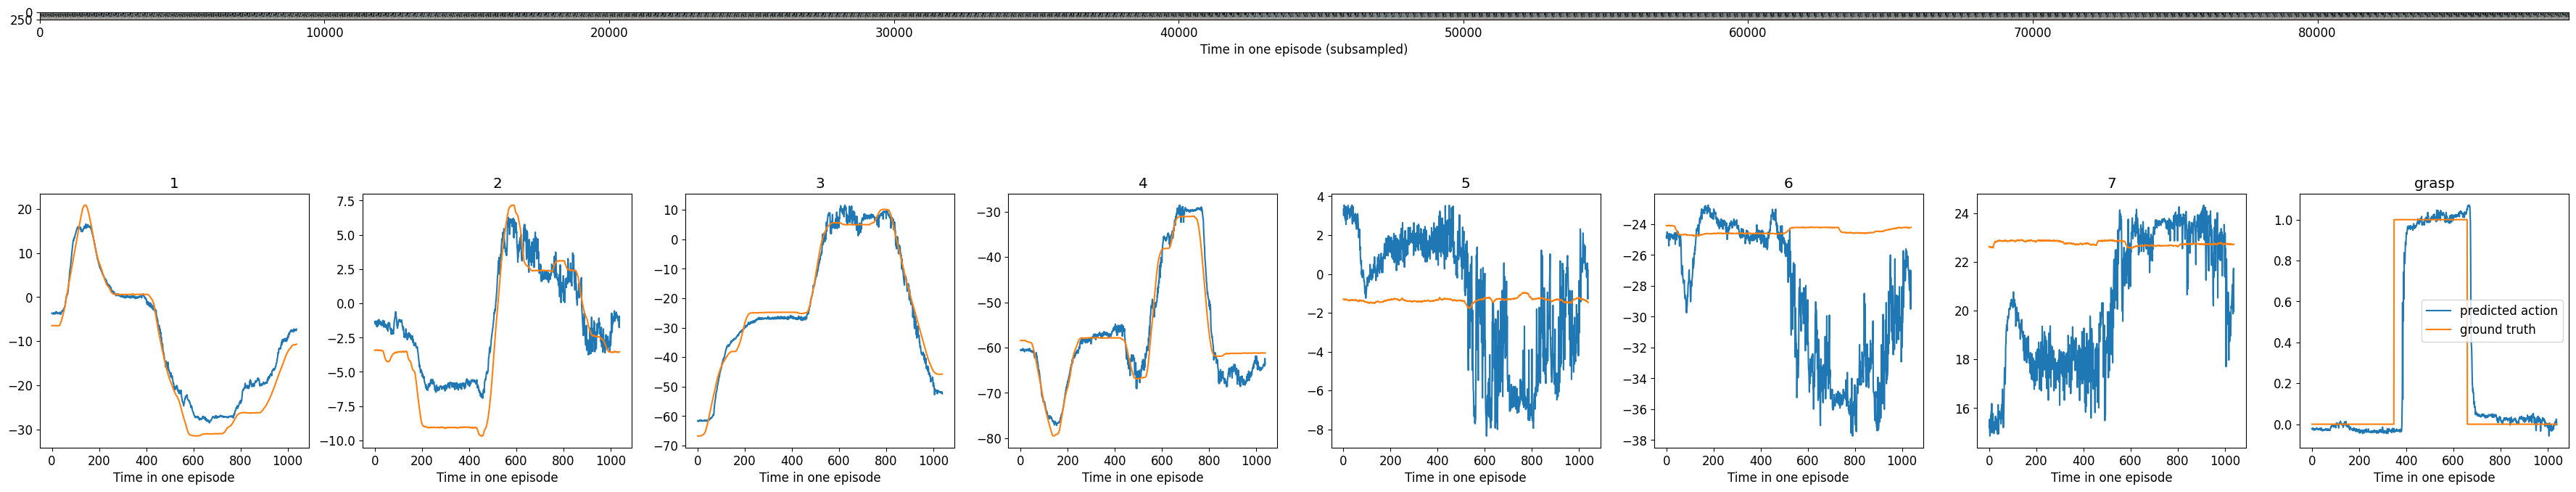

In [12]:
import matplotlib.pyplot as plt

ACTION_DIM_LABELS = ['1', '2', '3', '4', '5', '6', '7','grasp']

# build image strip to show above actions
img_strip = np.concatenate(np.array(images02[::3]), axis=1)

# set up plt figure
figure_layout = [
    ['image'] * len(ACTION_DIM_LABELS),
    ACTION_DIM_LABELS
]
plt.rcParams.update({'font.size': 12})
fig, axs = plt.subplot_mosaic(figure_layout)
fig.set_size_inches([45, 10])

# plot actions
pred_actions = np.array(pred_actions).squeeze()
true_actions = np.array(true_actions).squeeze()
for action_dim, action_label in enumerate(ACTION_DIM_LABELS):
  # actions have batch, horizon, dim, in this example we just take the first action for simplicity
  axs[action_label].plot(pred_actions[:, 0, action_dim], label='predicted action')
  axs[action_label].plot(true_actions[:, action_dim], label='ground truth')
  axs[action_label].set_title(action_label)
  axs[action_label].set_xlabel('Time in one episode')

axs['image'].imshow(img_strip)
axs['image'].set_xlabel('Time in one episode (subsampled)')
plt.legend()

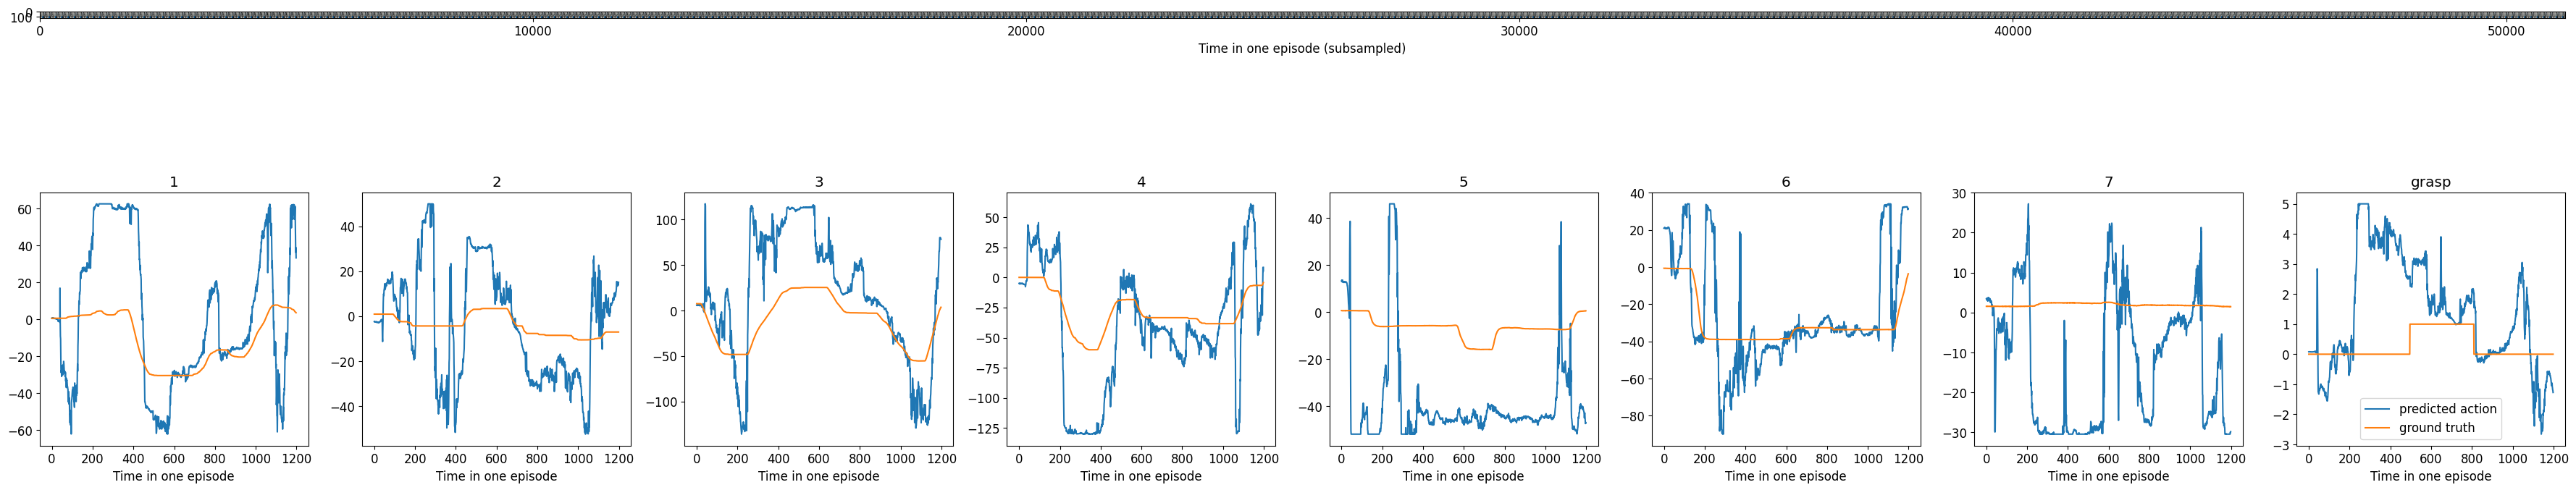

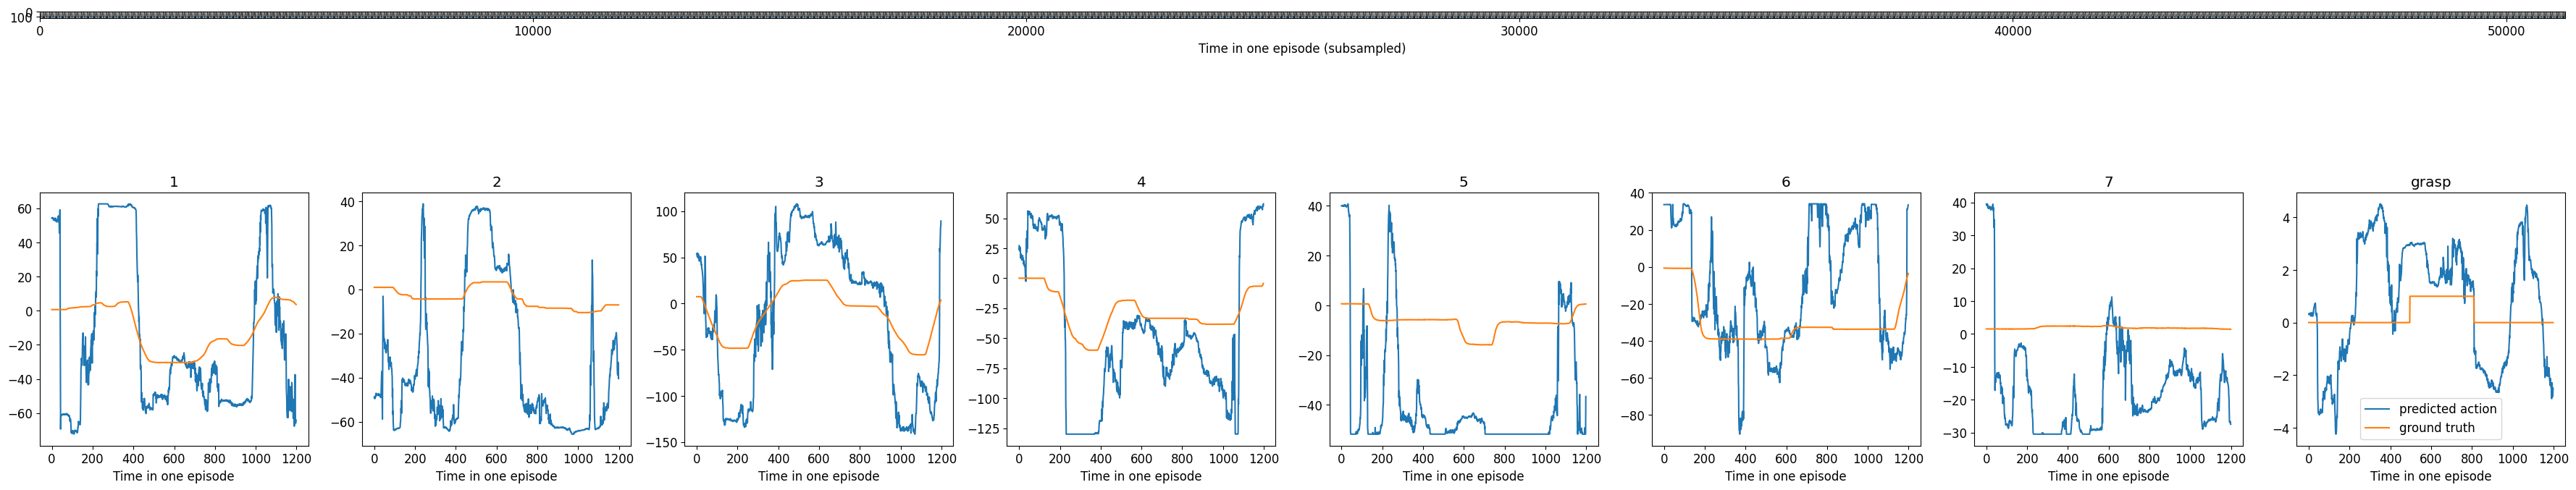

In [29]:
# 1000

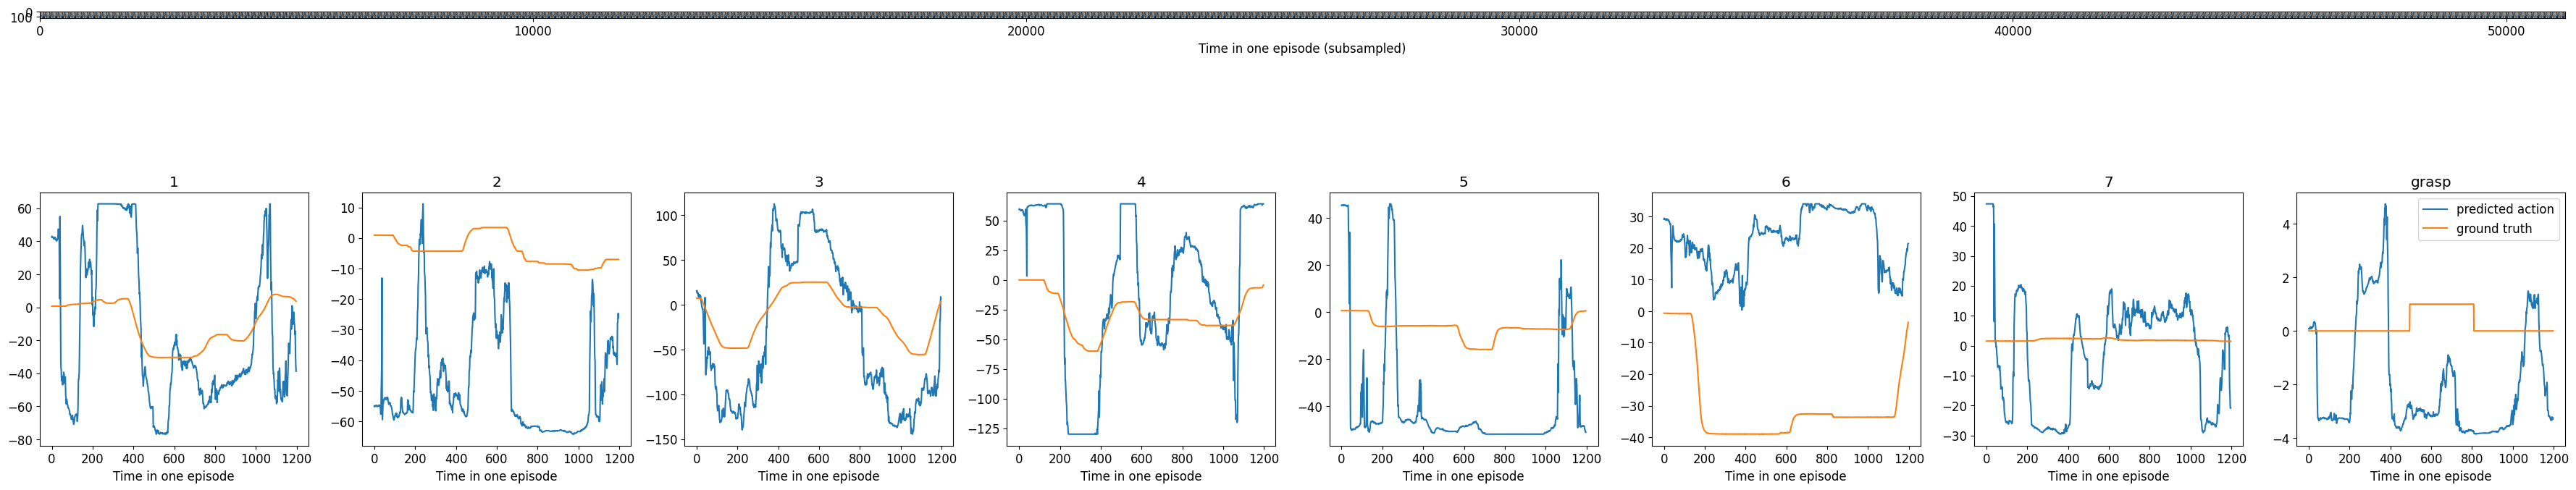

In [32]:
# 10000 2win

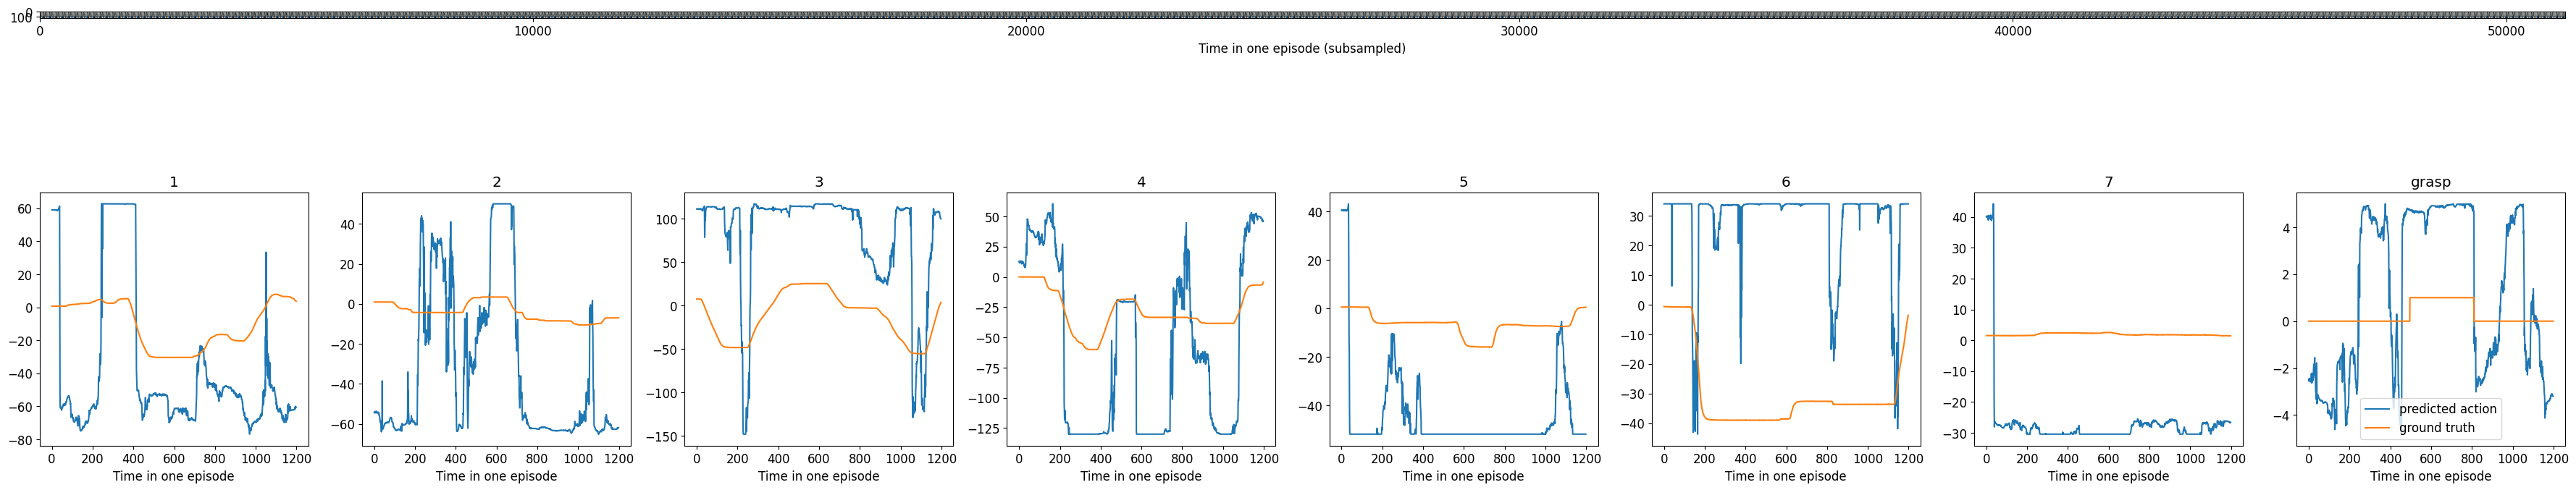

In [38]:
# 1win 6000

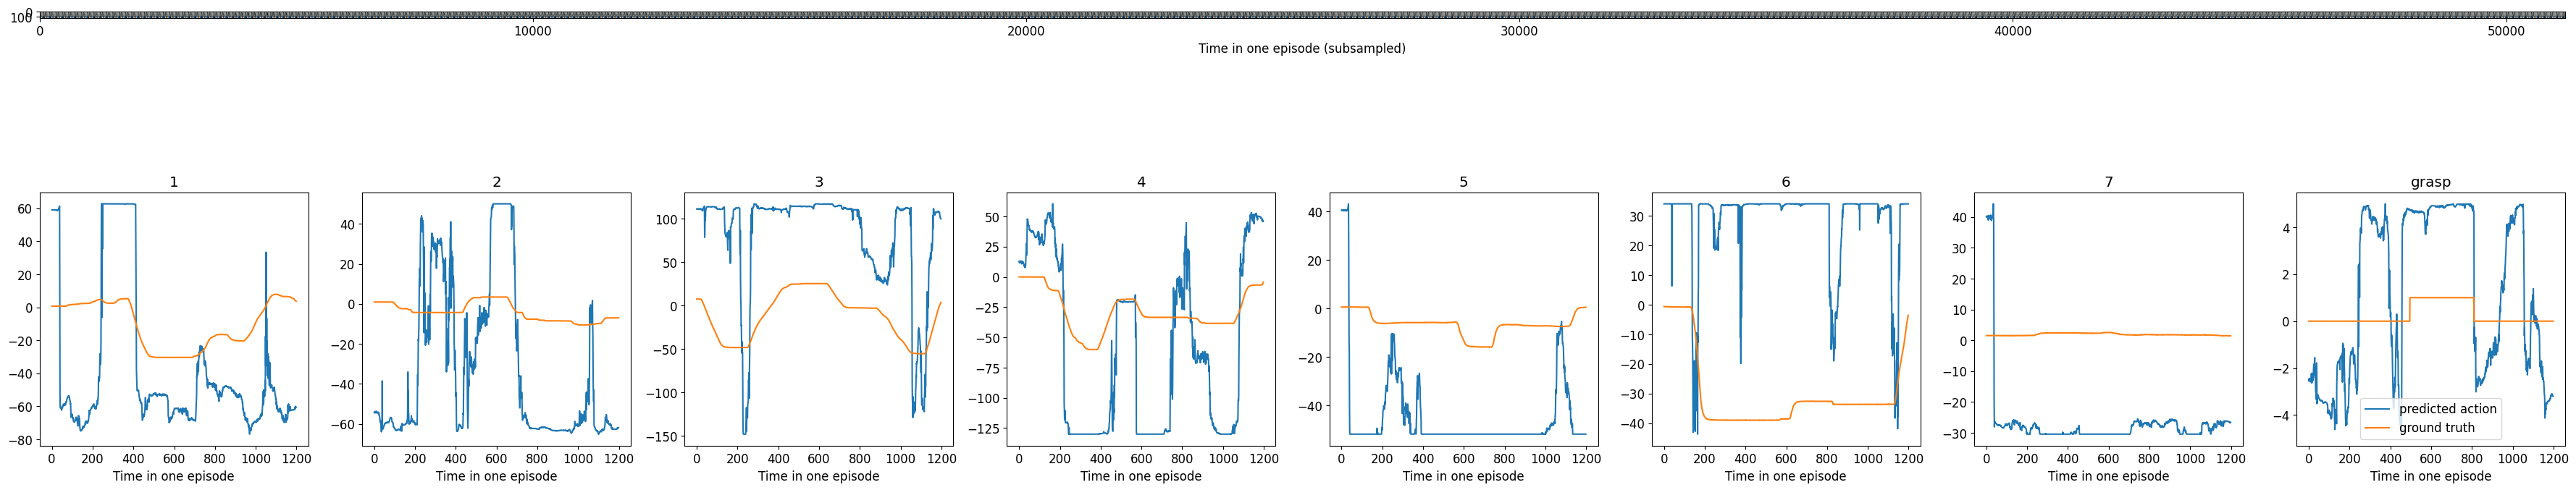

In [42]:
import matplotlib.pyplot as plt

ACTION_DIM_LABELS = ['1', '2', '3', '4', '5', '6', '7','grasp']

# build image strip to show above actions
img_strip = np.concatenate(np.array(images02[::3]), axis=1)

# set up plt figure
figure_layout = [
    ['image'] * len(ACTION_DIM_LABELS),
    ACTION_DIM_LABELS
]
plt.rcParams.update({'font.size': 12})
fig, axs = plt.subplot_mosaic(figure_layout)
fig.set_size_inches([45, 10])

# plot actions
pred_actions = np.array(pred_actions).squeeze()
true_actions = np.array(true_actions).squeeze()
true_actions = np.array(true_states).squeeze()
for action_dim, action_label in enumerate(ACTION_DIM_LABELS):
  # actions have batch, horizon, dim, in this example we just take the first action for simplicity
  axs[action_label].plot(pred_actions[:, 0, action_dim], label='predicted action')
  axs[action_label].plot(true_actions[:, action_dim], label='ground truth')
  axs[action_label].set_title(action_label)
  axs[action_label].set_xlabel('Time in one episode')

axs['image'].imshow(img_strip)
axs['image'].set_xlabel('Time in one episode (subsampled)')
plt.legend()